# Dungeons And Dragons and Stats

Dungeons and Dragons is a Tabletop Roleplaying game (RPG) produced by Wizards of the coast.

In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")


Lets load in the dataset. Note that this is a tab seperated table. We'll use `\t` as the seperator to get it to load in right.

In [2]:
dnd_df = pd.read_csv("https://raw.githubusercontent.com/ErikSeguinte/dndstats/master/docs/charTable.tsv", sep = '\t')

In [3]:
# dnd_df.head()

The maintainer of this Dataset already did some processing and cleanup. (See the `Processed*` columns, but we're going to ignore those. This is supposed to be a learning experience, right?

Lets start with classes. What do these values look like?

In [4]:
pd.set_option('display.max_rows', 10)
dnd_df['class'].value_counts()


Fighter 1                50
Rogue 1                  44
Cleric 1                 32
Ranger 1                 30
Sorcerer 1               29
                         ..
Ranger 9                  1
Fighter 4|Barbarian 9     1
Warlock 16                1
Monk 10|Barbarian 3       1
Monk 2|Barbarian 3        1
Name: class, Length: 309, dtype: int64

Looks like there are a few issues. The first is that Class and level have been combined. So a 1st level wizard is in listed as `Wizard 1`. We'll want to split those up into class and level.

The next thing is multiclassing. Someone can be `wizard 1` and `barbarian 2`. In the data, they are seperated by the `|` character. We'll start by cleaning this up.

First, we'll use the `str.split()` function of the `pd.DataFrame` class to turn this string into a list of strings. Note that rows with only a single class are still turned into a list with 1 element.



In [5]:
dnd_df['class'] = dnd_df['class'].str.split('|')
dnd_df['class']

0                  [Warlock 1]
1                  [Warlock 1]
2                  [Warlock 3]
3                   [Wizard 1]
4                   [Cleric 4]
                 ...          
1342              [Warlock 20]
1343              [Paladin 20]
1344    [Wizard 20, Cleric 10]
1345                [Druid 12]
1346             [Barbarian 3]
Name: class, Length: 1347, dtype: object

In [6]:
# Drop anyone with more than 2 classes
valid_multiclass = dnd_df['class'].str.len() <= 2
dnd_df = dnd_df[valid_multiclass]


In [7]:
# Split Class list into 2 columns, class 1 and 2
dnd_df[['class1', 'class2']] = pd.DataFrame(dnd_df['class'].values.tolist(), index = dnd_df.index)


In [8]:
dnd_df.sample(5)

,name,race,background,date,class,justClass,subclass,level,feats,HP,...,spells,day,processedAlignment,good,lawful,processedRace,processedSpells,processedWeapons,class1,class2
448,cb9242,Goblin,Criminal,2018-06-23T03:10:32Z,[Sorcerer 16],Sorcerer,Wild Magic,16,Lucky,104,...,NaN,06 22 18,NaN,NaN,NaN,Goblin,NaN,Quarterstaff|Dagger,Sorcerer 16,None
220,cd6bd2,Human,Soldier,2018-06-15T03:56:44Z,[Barbarian 15],Barbarian,Path of the Totem Warrior,15,Sentinel|Polearm Master,201,...,NaN,06 14 18,NaN,NaN,NaN,Human,NaN,Halberd|Handaxe|Javelin,Barbarian 15,None
302,55ae87,Forest Gnome,Noble,2018-06-07T20:49:59Z,[Ranger 5],Ranger,Hunter,5,Magic Initiate,44,...,Mold Earth*0|Light*0|Cure Wounds*1|Hunters Mar...,06 07 18,NaN,NaN,NaN,Gnome,Mold Earth*0|Light*0|Cure Wounds*1|Hunter’s Ma...,Shortsword|Shortbow,Ranger 5,None
871,1fb9b1,Dark Elf,Criminal,2018-08-12T10:52:33Z,[Rogue 5],Rogue,Mastermind,5,NaN,33,...,NaN,08 12 18,NaN,NaN,NaN,Elf,NaN,Shortsword|Dagger,Rogue 5,None
996,17c920,Human,Urchin,2018-04-10T19:19:07Z,[Paladin 1],Paladin,NaN,1,Durable,12,...,NaN,04 10 18,NaN,NaN,NaN,Human,NaN,Greatsword|Mace,Paladin 1,None


In [9]:
dnd_df[['just_class1', 'just_level1']] = pd.DataFrame(dnd_df['class1'].str.rsplit(" ",1, expand = True).values, index = dnd_df.index)
dnd_df[['just_class2', 'just_level2']] = pd.DataFrame(dnd_df['class2'].str.rsplit(" ",1, expand = True).values, index = dnd_df.index)

In [10]:
dnd_df[dnd_df['just_class2'] == 'Revised Ranger'].head()

,name,race,background,date,class,justClass,subclass,level,feats,HP,...,lawful,processedRace,processedSpells,processedWeapons,class1,class2,just_class1,just_level1,just_class2,just_level2
238,75040a,Goblin,Criminal,2018-06-24T13:27:55Z,"[Rogue 7, Revised Ranger 5]",Rogue|Revised Ranger,Assassin|Beast Conclave,12,NaN,29,...,NaN,Goblin,Ensnaring Strike*1|Hail of Thorns*1|Hunter’s M...,Rapier|Shortbow|Dagger|Scimitar,Rogue 7,Revised Ranger 5,Rogue,7,Revised Ranger,5
239,75040a,Goblin,Criminal,2018-06-16T01:12:10Z,"[Rogue 7, Revised Ranger 5]",Rogue|Revised Ranger,Assassin|Beast Conclave,12,NaN,112,...,NaN,Goblin,Ensnaring Strike*1|Hail of Thorns*1|Hunter’s M...,Rapier|Shortbow|Dagger,Rogue 7,Revised Ranger 5,Rogue,7,Revised Ranger,5
855,75040a,Goblin,Criminal,2018-06-23T05:33:10Z,"[Rogue 7, Revised Ranger 5]",Rogue|Revised Ranger,Assassin|Beast Conclave,12,NaN,29,...,NaN,Goblin,Ensnaring Strike*1|Hail of Thorns*1|Hunter’s M...,Rapier|Shortbow|Dagger|Scimitar,Rogue 7,Revised Ranger 5,Rogue,7,Revised Ranger,5
856,75040a,Goblin,Criminal,2018-06-16T01:21:48Z,"[Rogue 7, Revised Ranger 5]",Rogue|Revised Ranger,Assassin|Beast Conclave,12,NaN,112,...,NaN,Goblin,Ensnaring Strike*1|Hail of Thorns*1|Hunter’s M...,Rapier|Shortbow|Dagger,Rogue 7,Revised Ranger 5,Rogue,7,Revised Ranger,5
1297,cb5042,Dragonborn,Sailor,2018-05-19T18:20:26Z,"[Fighter 8, Revised Ranger 4]",Fighter|Revised Ranger,Sharpshooter|Hunter Conclave,12,Tough,113,...,NaN,Dragonborn,Hunter’s Mark*1|Goodberry*1|Cure Wounds*1,"Longbow|Rapier|Crossbow, Light",Fighter 8,Revised Ranger 4,Fighter,8,Revised Ranger,4


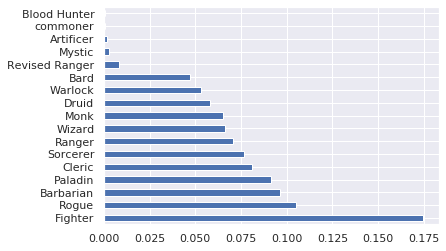

In [11]:
dnd_df['just_class1'].value_counts(normalize=True).plot(kind='barh');

In [12]:
def graph_classes(df):
  ax = sns.countplot(x = 'just_class1', data=df,)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  plt.tight_layout()
  plt.show();

def graph_series(s):
  ax = sns.countplot(x = s.index, data=s)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  plt.tight_layout()
  plt.show();

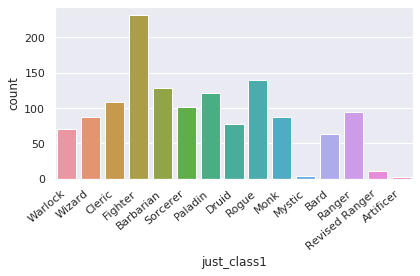

In [13]:
# Drop weird classes 
weird_classes = ['Blood Hunter', 'commoner', 'mystic']
for class_ in weird_classes:
  dnd_df = dnd_df[dnd_df['just_class1'] != class_]

graph_classes(dnd_df)

In [14]:
class_df = pd.concat([dnd_df['just_class1'], dnd_df['just_class2']], ignore_index=True)
class_df.value_counts()

Fighter           253
Cleric            164
Rogue             163
Barbarian         149
Paladin           122
                 ... 
Druid              86
Bard               73
Revised Ranger     17
Mystic              5
Artificer           2
Length: 15, dtype: int64

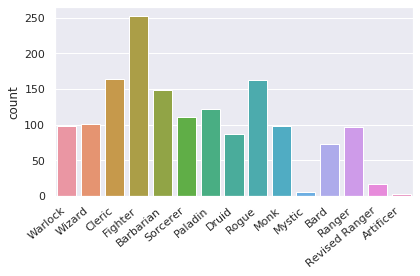

In [15]:
graph_series(class_df)

In [16]:
dnd_df['just_class1'].value_counts()

Fighter           232
Rogue             140
Barbarian         128
Paladin           122
Cleric            108
                 ... 
Warlock            71
Bard               63
Revised Ranger     11
Mystic              4
Artificer           2
Name: just_class1, Length: 15, dtype: int64

In [17]:
second_class_df = dnd_df[dnd_df['just_class2'].notnull()].copy()

In [18]:
second_class_df[['just_class1', 'just_level1']] = second_class_df[['just_class2', 'just_level2']].copy()

In [19]:
second_class_df.shape

(210, 34)

In [20]:
dnd_df.shape

(1329, 34)

In [21]:
single_class_df = pd.concat([dnd_df, second_class_df.copy()]).copy()

In [22]:
single_class_df = single_class_df.drop(['date','class','processedRace', 'processedWeapons','processedSpells'],axis = 1)

In [23]:
race_and_class = pd.crosstab(single_class_df['just_class1'], single_class_df['race']).T

In [24]:
race_and_class

just_class1,Artificer,Barbarian,Bard,Cleric,Druid,Fighter,Monk,Mystic,Paladin,Ranger,Revised Ranger,Rogue,Sorcerer,Warlock,Wizard
race,,,,,,,,,,,,,,,
1/2 Elf--Var.,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Aarakocra,0,1,0,2,0,0,5,0,1,1,2,2,0,0,4
Air Genasi,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0
Bugbear,0,1,1,0,0,3,0,0,0,0,0,0,0,0,0
Centaur,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Water Genasi,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
Wood Elf,0,0,0,10,15,3,16,0,0,21,0,23,1,2,4
Yuan-Ti,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0


In [25]:
pd.set_option('display.max_rows', 100)
single_class_df['race'].value_counts()

Human                                 413
Wood Elf                               95
Half-Orc                               87
Dragonborn                             87
Half-Elf                               83
Tiefling                               59
Goliath                                53
Mountain Dwarf                         52
Forest Gnome                           43
High Elf                               42
Lightfoot Halfling                     35
Goblin                                 34
Firbolg                                31
Hill Dwarf                             28
Protector Aasimar                      28
Dark Elf                               25
Turtle                                 24
Variant                                24
Ghastly Halfling                       19
Tabaxi                                 18
Minotaur                               18
Stout Halfling                         18
Aarakocra                              18
Triton                            

Races are mixed in with subraces, which makes it more difficult to classify.

`Wood Elf` should really just be `Elf`, with a subrace of `Wood Elf`

For the most part, we can classify them by splitting them and taking the second last word.

In [26]:
def clean_race(s:str):
    if isinstance(s, str):
        split = s.split(' ')
        return split[-1]
        

In [27]:
single_class_df['race'] = single_class_df['race'].apply(clean_race)
single_class_df

,name,race,background,justClass,subclass,level,feats,HP,AC,Str,...,day,processedAlignment,good,lawful,class1,class2,just_class1,just_level1,just_class2,just_level2
0,9f3a61,Human,Charlatan,Warlock,The Fiend,1,Lucky,8,12,10,...,07 27 18,CN,N,C,Warlock 1,None,Warlock,1,None,None
1,9f3a61,Human,Custom,Warlock,The Fiend,1,Lucky,8,12,10,...,07 27 18,CN,N,C,Warlock 1,None,Warlock,1,None,None
2,7a2bfc,Kenku,Criminal,Warlock,The Celestial,3,NaN,13,13,8,...,05 27 18,NaN,NaN,NaN,Warlock 3,None,Warlock,3,None,None
3,aa8854,Elf,Criminal,Wizard,NaN,1,NaN,7,13,10,...,08 04 18,NaN,NaN,NaN,Wizard 1,None,Wizard,1,None,None
4,26410c,Firbolg,Folk Hero,Cleric,Trickery Domain,4,Inspiring Leader,42,16,16,...,07 25 18,NaN,NaN,NaN,Cleric 4,None,Cleric,4,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,6d7fde,Human,Courtier,Fighter|Bard,Purple Dragon Knight|College of Glamour,12,Inspiring Leader|Heavy Armor Master,92,20,16,...,05 12 18,NaN,NaN,NaN,Fighter 4,Bard 8,Bard,8,Bard,8
1325,138779,Halfling,Criminal,Rogue|Cleric,Assassin|Death Domain,12,NaN,87,15,8,...,05 12 18,NaN,NaN,NaN,Rogue 4,Cleric 8,Cleric,8,Cleric,8
1336,07469b,Half-Orc,Clan Crafter,Paladin|Sorcerer,Oath of Devotion|Divine Soul,5,Shield Master,42,19,16,...,05 11 18,NaN,NaN,NaN,Paladin 4,Sorcerer 1,Sorcerer,1,Sorcerer,1
1337,5528fb,Human,Criminal,Fighter|Cleric,Battle Master|Forge Domain,9,Crossbow Expert|Sharpshooter|Resilient,84,17,9,...,05 23 18,LN,N,L,Fighter 8,Cleric 1,Cleric,1,Cleric,1


In [28]:
counts = single_class_df['race'].value_counts()
counts

Human           413
Elf             179
Half-Orc         87
Dragonborn       87
Dwarf            86
Half-Elf         83
Halfling         74
Gnome            62
Tiefling         59
Goliath          53
Aasimar          38
Goblin           34
Firbolg          31
Variant          28
Turtle           24
Aarakocra        18
Tabaxi           18
Minotaur         18
Triton           16
Kenku            14
Genasi           14
Lizardfolk       11
Kobold            8
Glas              7
Serpentblood      7
Meadowguard       5
Bugbear           5
Mamm              4
Tosculi           4
Warforged         4
Orc               4
Fier              3
Meio-Orc          3
Gray-Elf          3
Changeling        3
Tortle            3
Baal              2
Zari              2
elf               2
Skellington       2
Kishi             2
naga              2
Yuan-Ti           2
Centaur           1
DMG               1
Tribe             1
Juggernaut        1
Parents           1
Giant             1
ToF               1


I think we might have a few home brew or other unusual races. Lets say any races with a frequency of 5 or less is unusual and we'll go ahead and drop them

In [30]:
unusual_classes = counts[counts < 5].index
unusual_classes



Index(['Mamm', 'Tosculi', 'Warforged', 'Orc', 'Fier', 'Meio-Orc', 'Gray-Elf',
       'Changeling', 'Tortle', 'Baal', 'Zari', 'elf', 'Skellington', 'Kishi',
       'naga', 'Yuan-Ti', 'Centaur', 'DMG', 'Tribe', 'Juggernaut', 'Parents',
       'Giant', 'ToF', 'Eladrin', 'Snake', 'Turtlebear', 'Naga', 'Elf--Var.'],
      dtype='object')

In [33]:
single_class_df = single_class_df[~(single_class_df['race'].isin(unusual_classes))]


In [34]:
single_class_df

,name,race,background,justClass,subclass,level,feats,HP,AC,Str,...,day,processedAlignment,good,lawful,class1,class2,just_class1,just_level1,just_class2,just_level2
0,9f3a61,Human,Charlatan,Warlock,The Fiend,1,Lucky,8,12,10,...,07 27 18,CN,N,C,Warlock 1,None,Warlock,1,None,None
1,9f3a61,Human,Custom,Warlock,The Fiend,1,Lucky,8,12,10,...,07 27 18,CN,N,C,Warlock 1,None,Warlock,1,None,None
2,7a2bfc,Kenku,Criminal,Warlock,The Celestial,3,NaN,13,13,8,...,05 27 18,NaN,NaN,NaN,Warlock 3,None,Warlock,3,None,None
3,aa8854,Elf,Criminal,Wizard,NaN,1,NaN,7,13,10,...,08 04 18,NaN,NaN,NaN,Wizard 1,None,Wizard,1,None,None
4,26410c,Firbolg,Folk Hero,Cleric,Trickery Domain,4,Inspiring Leader,42,16,16,...,07 25 18,NaN,NaN,NaN,Cleric 4,None,Cleric,4,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,6d7fde,Human,Courtier,Fighter|Bard,Purple Dragon Knight|College of Glamour,12,Inspiring Leader|Heavy Armor Master,92,20,16,...,05 12 18,NaN,NaN,NaN,Fighter 4,Bard 8,Bard,8,Bard,8
1325,138779,Halfling,Criminal,Rogue|Cleric,Assassin|Death Domain,12,NaN,87,15,8,...,05 12 18,NaN,NaN,NaN,Rogue 4,Cleric 8,Cleric,8,Cleric,8
1336,07469b,Half-Orc,Clan Crafter,Paladin|Sorcerer,Oath of Devotion|Divine Soul,5,Shield Master,42,19,16,...,05 11 18,NaN,NaN,NaN,Paladin 4,Sorcerer 1,Sorcerer,1,Sorcerer,1
1337,5528fb,Human,Criminal,Fighter|Cleric,Battle Master|Forge Domain,9,Crossbow Expert|Sharpshooter|Resilient,84,17,9,...,05 23 18,LN,N,L,Fighter 8,Cleric 1,Cleric,1,Cleric,1


In [35]:
race_and_class = pd.crosstab(single_class_df['just_class1'], single_class_df['race']).T

In [36]:
race_and_class

just_class1,Artificer,Barbarian,Bard,Cleric,Druid,Fighter,Monk,Mystic,Paladin,Ranger,Revised Ranger,Rogue,Sorcerer,Warlock,Wizard
race,,,,,,,,,,,,,,,
Aarakocra,0,1,0,2,0,0,5,0,1,1,2,2,0,0,4
Aasimar,0,0,3,12,1,1,0,0,7,0,0,1,12,1,0
Bugbear,0,1,1,0,0,3,0,0,0,0,0,0,0,0,0
Dragonborn,0,17,1,1,0,19,0,0,22,3,2,3,9,8,2
Dwarf,0,30,0,12,7,11,1,0,9,4,0,5,3,1,3
Elf,0,2,2,16,17,17,18,1,4,29,0,37,9,5,22
Firbolg,0,4,0,6,15,3,1,0,0,0,0,1,0,0,1
Genasi,0,0,0,0,0,1,0,0,2,4,0,0,1,0,6
Glas,0,0,0,0,0,0,0,0,0,0,0,2,5,0,0


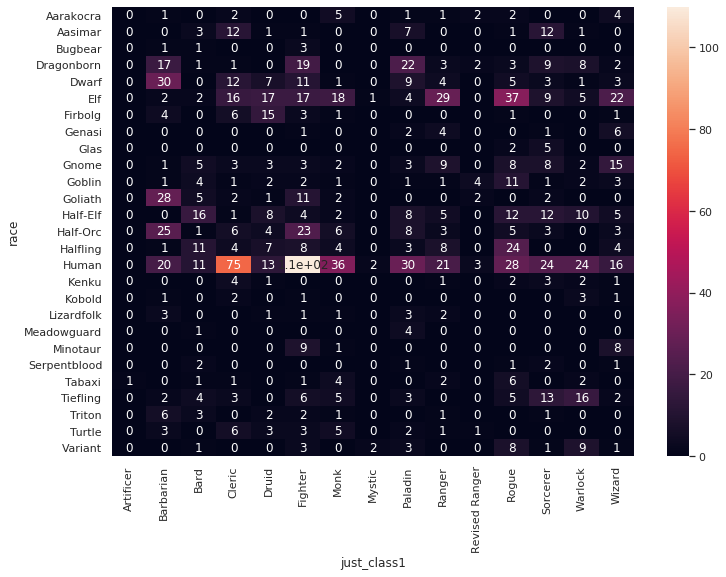

In [50]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(race_and_class, annot = True)



In [65]:
fig = go.Figure(
    data = go.Heatmap(
        z=race_and_class,
        x=race_and_class.columns,
        y=race_and_class.index)
)
fig.update_layout(
    autosize=False,
    width = 800,
    height=800
)
fig.show()